# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
There is no difference between the performance of the current email template and the new one. 

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
There is a difference between the performance of the current email template and the new one.

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [3]:
# Calculate the required sample size
pnew = 0.06
pcurrent = 0.05
std = 0.0475

# Cohen's d is calculated as:
d = (pnew - pcurrent) / std
d


0.2105263157894736

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

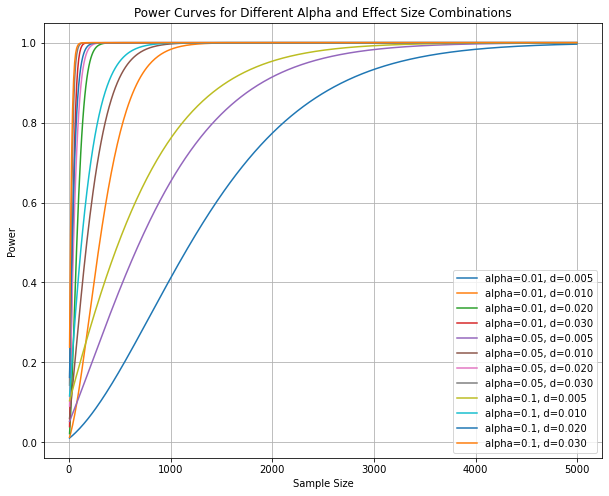

In [4]:
#Your code; plot power curves for the various alpha and effect size combinations
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Initialize parameters
alpha_values = [0.01, 0.05, 0.1] 
effect_sizes = [0.005, 0.01, 0.02, 0.03]
power = 0.8 

# Instantiate the power analysis object
analysis = TTestIndPower()

# Set up the sample size range
sample_sizes = np.arange(5, 5000, 10)

# Plot power curves for different combinations of alpha and effect size
plt.figure(figsize=(10, 8))

for alpha in alpha_values:
    for effect_size in effect_sizes:
        # Cohen's d for each effect size
        d = effect_size / 0.0475
        
        # Calculate the power for each sample size and effect size
        power_curve = [analysis.solve_power(effect_size=d, alpha=alpha, nobs1=n, power=None, ratio=1.0) for n in sample_sizes]
        
        plt.plot(sample_sizes, power_curve, label=f'alpha={alpha}, d={effect_size:.3f}')

plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Curves for Different Alpha and Effect Size Combinations')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [5]:
"""
In this case, we will have two groups: Group 1 (Control Group) where half of the sample (1,538 individuals based on the calculations before) will receive the current email template.
Group 2 (Treatment Group) also (1,538 individuals) will receive the new email template.
We will then use a two-sample t-test to compare the response rates between the control group and the treatment group to assess if there is a significant difference.
Overall, this design will test whether the new email template outperforms the current one since the sample size is large enough to detect a meaningful effect with reasonable confidence.
Additionally, the statistical test will give us clear evidence of whether the new template is worth implementing.
"""

'\nIn this case, we will have two groups: Group 1 (Control Group) where half of the sample (1,538 individuals based on the calculations before) will receive the current email template.\nGroup 2 (Treatment Group) also (1,538 individuals) will receive the new email template.\nWe will then use a two-sample t-test to compare the response rates between the control group and the treatment group to assess if there is a significant difference.\nOverall, this design will test whether the new email template outperforms the current one since the sample size is large enough to detect a meaningful effect with reasonable confidence.\nAdditionally, the statistical test will give us clear evidence of whether the new template is worth implementing.\n'

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.